<a href="https://colab.research.google.com/github/hsnam95/class2022Fall/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading a dataset

In [1]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Comparing Algorithms

In [2]:
import numpy as np

X = np.array(iris.drop(['label'], axis=1))
y = np.array(iris['label'])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # n_components specifies the new dimensionality
X_reduced = pca.fit(X).transform(X) # or just pca.fit_transform(X)
X_reduced = pd.DataFrame(data=X_reduced, columns=['x', 'y'])

In [4]:
X_reduced.head()

,x,y
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [5]:
print('Components:', pca.components_)
print('Explained Variance:', pca.explained_variance_)
print('Explained Variance Ratio:', pca.explained_variance_ratio_ )

Components: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Explained Variance: [4.22484077 0.24224357]
Explained Variance Ratio: [0.92461621 0.05301557]


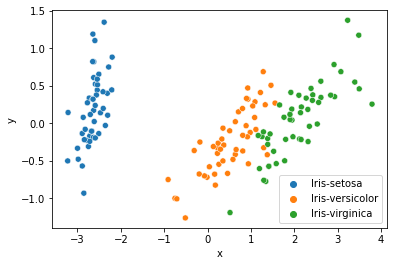

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

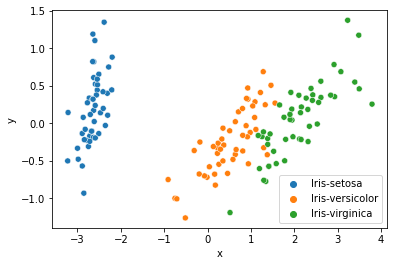

In [7]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=3) # bacth_size specifies the number of samples per batch
X_reduced = pca.fit(X).transform(X) # or just pca.fit_transform(X)
X_reduced = pd.DataFrame(data=X_reduced, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

Kernel PCA is able to find a projection of the data that makes it linearly separable.

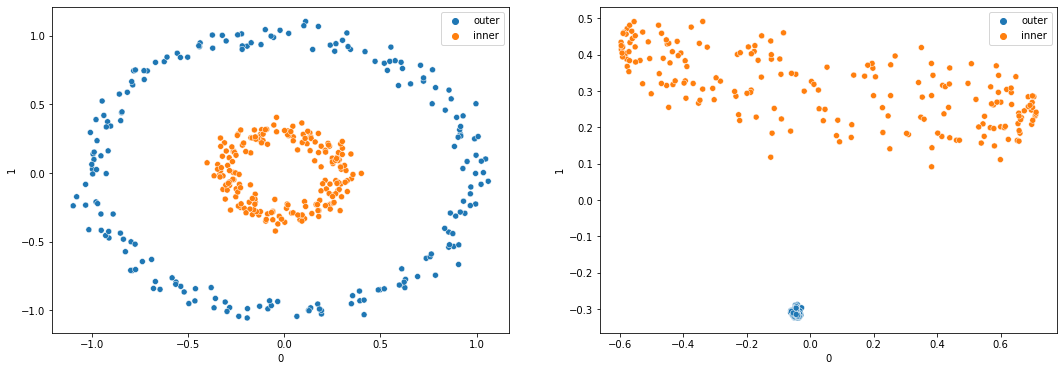

In [8]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)
y = np.array(['outer' if y_==0 else 'inner' for y_ in y])
kpca = KernelPCA(kernel="rbf", gamma=10) # gamma is the Kernel coefficient.
X_kpca = kpca.fit(X).transform(X)
X_kpca = pd.DataFrame(X_kpca)
X = pd.DataFrame(X)
fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.scatterplot(x=0, y=1, hue=y, data=X, ax=ax[0])
sns.scatterplot(x=0, y=1, hue=y, data=X_kpca, ax=ax[1])